In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

1.9.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
    num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [3]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


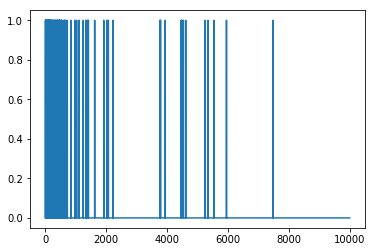

In [4]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [13]:
def create_model(nuerons=16, k_reg=None, Dropout=False, drop_rate=0.2):
    # Create base model
    model = keras.Sequential()
    # Add first layer and dropout
    model.add(keras.layers.Dense(nuerons,
                                 kernel_regularizer=k_reg,
                                 activation=tf.nn.relu, input_shape=(NUM_WORDS,)))
    if Dropout: model.add(keras.layers.Dropout(drop_rate))
    # Add second layer and dropout
    model.add(keras.layers.Dense(nuerons,
                                 kernel_regularizer=k_reg,
                                 activation=tf.nn.relu))
    if Dropout: model.add(keras.layers.Dropout(drop_rate))
    # add final output layer 
    model.add(keras.layers.Dense(1, 
                                 activation=tf.nn.sigmoid))
    # compile
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
    return model
    
    

In [6]:
baseline_model = create_model(16)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.4727 - acc: 0.8158 - binary_crossentropy: 0.4727 - val_loss: 0.3305 - val_acc: 0.8787 - val_binary_crossentropy: 0.3305
Epoch 2/20
 - 7s - loss: 0.2424 - acc: 0.9124 - binary_crossentropy: 0.2424 - val_loss: 0.2832 - val_acc: 0.8870 - val_binary_crossentropy: 0.2832
Epoch 3/20
 - 6s - loss: 0.1788 - acc: 0.9375 - binary_crossentropy: 0.1788 - val_loss: 0.2904 - val_acc: 0.8848 - val_binary_crossentropy: 0.2904
Epoch 4/20
 - 7s - loss: 0.1436 - acc: 0.9516 - binary_crossentropy: 0.1436 - val_loss: 0.3166 - val_acc: 0.8777 - val_binary_crossentropy: 0.3166
Epoch 5/20
 - 6s - loss: 0.1195 - acc: 0.9607 - binary_crossentropy: 0.1195 - val_loss: 0.3431 - val_acc: 0.8734 - val_binary_crossentropy: 0.3431
Epoch 6/20
 - 6s - loss: 0.0994 - acc: 0.9691 - binary_crossentropy: 0.0994 - val_loss: 0.3746 - val_acc: 0.8698 - val_binary_crossentropy: 0.3746
Epoch 7/20
 - 6s - loss: 0.0831 - acc: 0.9758 - binary_crossentropy:

In [8]:
smaller_model = create_model(4)
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6049 - acc: 0.7635 - binary_crossentropy: 0.6049 - val_loss: 0.5145 - val_acc: 0.8411 - val_binary_crossentropy: 0.5145
Epoch 2/20
 - 5s - loss: 0.4198 - acc: 0.8736 - binary_crossentropy: 0.4198 - val_loss: 0.3865 - val_acc: 0.8666 - val_binary_crossentropy: 0.3865
Epoch 3/20
 - 5s - loss: 0.3118 - acc: 0.8997 - binary_crossentropy: 0.3118 - val_loss: 0.3264 - val_acc: 0.8798 - val_binary_crossentropy: 0.3264
Epoch 4/20
 - 6s - loss: 0.2531 - acc: 0.9164 - binary_crossentropy: 0.2531 - val_loss: 0.3004 - val_acc: 0.8854 - val_binary_crossentropy: 0.3004
Epoch 5/20
 - 6s - loss: 0.2171 - acc: 0.9275 - binary_crossentropy: 0.2171 - val_loss: 0.2895 - val_acc: 0.8866 - val_binary_crossentropy: 0.2895
Epoch 6/20
 - 6s - loss: 0.1910 - acc: 0.9365 - binary_crossentropy: 0.1910 - val_loss: 0.2844 - val_acc: 0.8873 - val_binary_crossentropy: 0.2844
Epoch 7/20
 - 6s - loss: 0.1704 - acc: 0.9444 - binary_crossentropy:

In [10]:
bigger_model = create_model(128)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3693 - acc: 0.8462 - binary_crossentropy: 0.3693 - val_loss: 0.2881 - val_acc: 0.8850 - val_binary_crossentropy: 0.2881
Epoch 2/20
 - 11s - loss: 0.1765 - acc: 0.9346 - binary_crossentropy: 0.1765 - val_loss: 0.3391 - val_acc: 0.8703 - val_binary_crossentropy: 0.3391
Epoch 3/20
 - 11s - loss: 0.1179 - acc: 0.9598 - binary_crossentropy: 0.1179 - val_loss: 0.3784 - val_acc: 0.8718 - val_binary_crossentropy: 0.3784
Epoch 4/20
 - 11s - loss: 0.0677 - acc: 0.9793 - binary_crossentropy: 0.0677 - val_loss: 0.4587 - val_acc: 0.8619 - val_binary_crossentropy: 0.4587
Epoch 5/20
 - 11s - loss: 0.0310 - acc: 0.9928 - binary_crossentropy: 0.0310 - val_loss: 0.5369 - val_acc: 0.8613 - val_binary_crossentropy: 0.5369
Epoch 6/20
 - 12s - loss: 0.0110 - acc: 0.9986 - binary_crossentropy: 0.0110 - val_loss: 0.6161 - val_acc: 0.8625 - val_binary_crossentropy: 0.6161
Epoch 7/20
 - 11s - loss: 0.0036 - acc: 0.9999 - binary_crosse

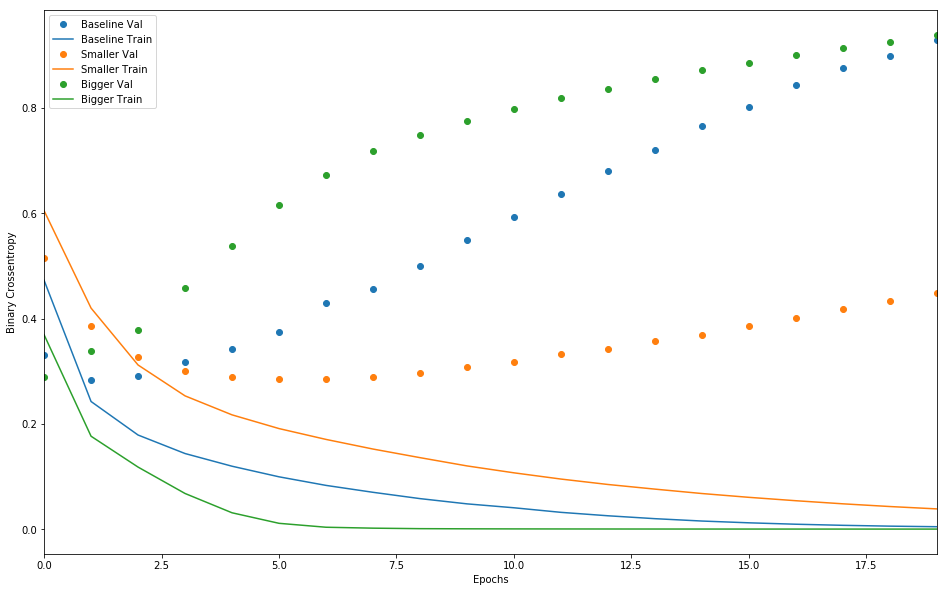

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_'+key],
                       'o',
                       label=name.title()+' Val')
        plt.plot(history.epoch,
                 history.history[key], 
                 color=val[0].get_color(), 
                 label=name.title()+' Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])
        
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)
])

In [14]:
l2_model = create_model(nuerons=16,
                        k_reg=keras.regularizers.l2(0.001))

In [15]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.5363 - acc: 0.7935 - binary_crossentropy: 0.4960 - val_loss: 0.3823 - val_acc: 0.8755 - val_binary_crossentropy: 0.3404
Epoch 2/20
 - 6s - loss: 0.3057 - acc: 0.9080 - binary_crossentropy: 0.2597 - val_loss: 0.3337 - val_acc: 0.8874 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 6s - loss: 0.2544 - acc: 0.9284 - binary_crossentropy: 0.2027 - val_loss: 0.3365 - val_acc: 0.8859 - val_binary_crossentropy: 0.2828
Epoch 4/20
 - 6s - loss: 0.2297 - acc: 0.9400 - binary_crossentropy: 0.1743 - val_loss: 0.3488 - val_acc: 0.8831 - val_binary_crossentropy: 0.2923
Epoch 5/20
 - 6s - loss: 0.2167 - acc: 0.9462 - binary_crossentropy: 0.1585 - val_loss: 0.3620 - val_acc: 0.8794 - val_binary_crossentropy: 0.3029
Epoch 6/20
 - 6s - loss: 0.2038 - acc: 0.9514 - binary_crossentropy: 0.1440 - val_loss: 0.3766 - val_acc: 0.8766 - val_binary_crossentropy: 0.3164
Epoch 7/20
 - 6s - loss: 0.1969 - acc: 0.9543 - binary_crossentropy:

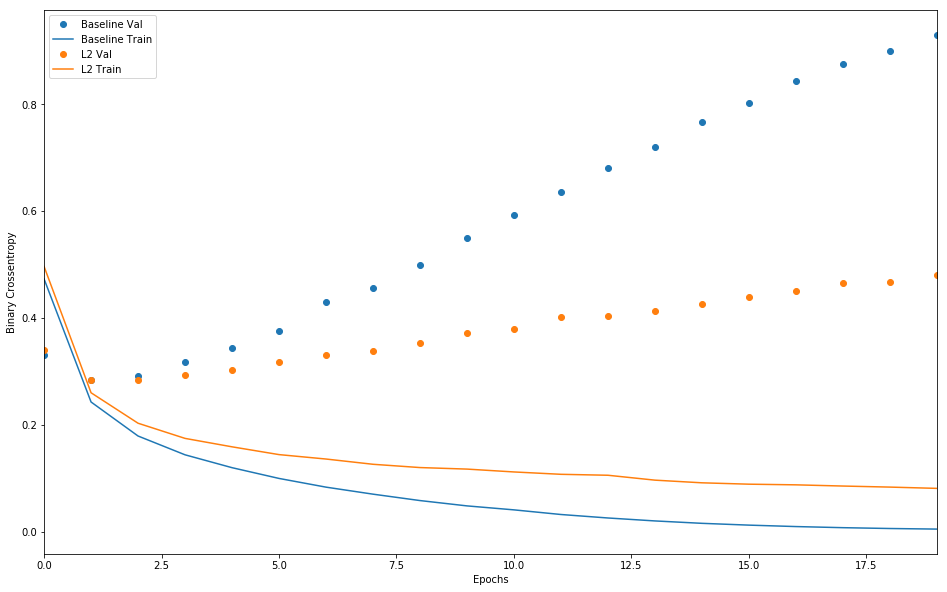

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [17]:
dpt_model = create_model(Dropout=True, drop_rate=0.5)

In [18]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6082 - acc: 0.6592 - binary_crossentropy: 0.6082 - val_loss: 0.4399 - val_acc: 0.8569 - val_binary_crossentropy: 0.4399
Epoch 2/20
 - 7s - loss: 0.4303 - acc: 0.8172 - binary_crossentropy: 0.4303 - val_loss: 0.3210 - val_acc: 0.8830 - val_binary_crossentropy: 0.3210
Epoch 3/20
 - 6s - loss: 0.3330 - acc: 0.8754 - binary_crossentropy: 0.3330 - val_loss: 0.2837 - val_acc: 0.8882 - val_binary_crossentropy: 0.2837
Epoch 4/20
 - 6s - loss: 0.2782 - acc: 0.8994 - binary_crossentropy: 0.2782 - val_loss: 0.2770 - val_acc: 0.8883 - val_binary_crossentropy: 0.2770
Epoch 5/20
 - 6s - loss: 0.2410 - acc: 0.9177 - binary_crossentropy: 0.2410 - val_loss: 0.2797 - val_acc: 0.8867 - val_binary_crossentropy: 0.2797
Epoch 6/20
 - 6s - loss: 0.2069 - acc: 0.9298 - binary_crossentropy: 0.2069 - val_loss: 0.2908 - val_acc: 0.8848 - val_binary_crossentropy: 0.2908
Epoch 7/20
 - 6s - loss: 0.1871 - acc: 0.9387 - binary_crossentropy:

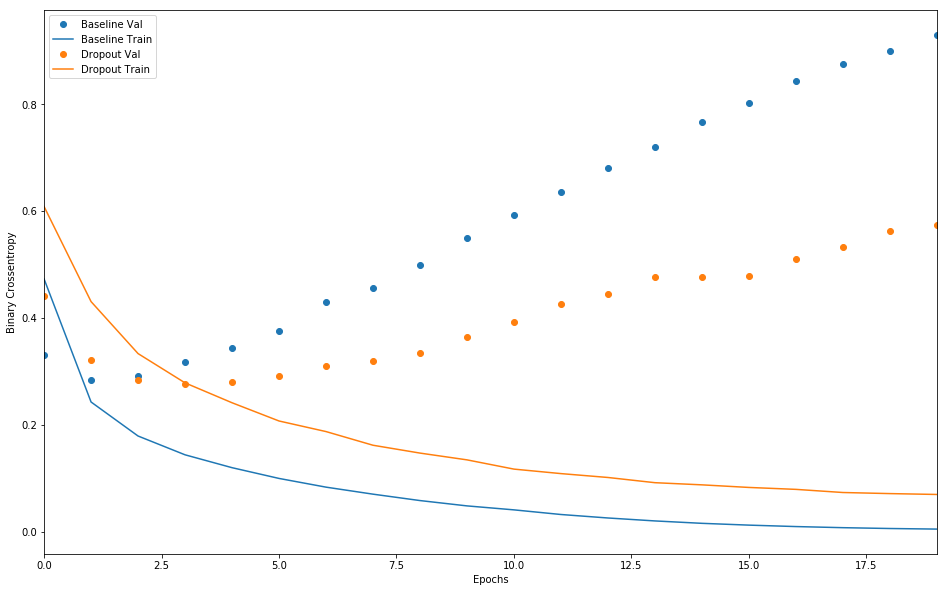

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [20]:
dpt_l2_model = create_model(Dropout=True, drop_rate=0.5, 
                            k_reg=keras.regularizers.l2(0.001))

In [21]:
dpt_l2_model_history = dpt_l2_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6547 - acc: 0.6438 - binary_crossentropy: 0.6187 - val_loss: 0.4923 - val_acc: 0.8573 - val_binary_crossentropy: 0.4580
Epoch 2/20
 - 6s - loss: 0.4892 - acc: 0.8083 - binary_crossentropy: 0.4527 - val_loss: 0.3733 - val_acc: 0.8820 - val_binary_crossentropy: 0.3340
Epoch 3/20
 - 6s - loss: 0.3961 - acc: 0.8609 - binary_crossentropy: 0.3533 - val_loss: 0.3316 - val_acc: 0.8878 - val_binary_crossentropy: 0.2852
Epoch 4/20
 - 6s - loss: 0.3475 - acc: 0.8911 - binary_crossentropy: 0.2976 - val_loss: 0.3276 - val_acc: 0.8884 - val_binary_crossentropy: 0.2745
Epoch 5/20
 - 6s - loss: 0.3167 - acc: 0.9059 - binary_crossentropy: 0.2610 - val_loss: 0.3346 - val_acc: 0.8876 - val_binary_crossentropy: 0.2762
Epoch 6/20
 - 6s - loss: 0.2926 - acc: 0.9178 - binary_crossentropy: 0.2321 - val_loss: 0.3456 - val_acc: 0.8862 - val_binary_crossentropy: 0.2832
Epoch 7/20
 - 6s - loss: 0.2778 - acc: 0.9244 - binary_crossentropy: